In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
path = "Brent_crude_oil.csv"
brent_df=pd.read_csv(path)

In [3]:
brent_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/01/2010,80.120003,79.82,80.120003,80.120003,80.120003,97.0


In [4]:
brent_df.dropna(inplace = True)

In [5]:
brent_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df1=brent_df.copy()

In [7]:
df1["Date"]=pd.to_datetime(brent_df["Date"],format='%d/%m/%Y')
df1.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,80.120003,79.82,80.120003,80.120003,80.120003,97.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2485 non-null   datetime64[ns]
 1   Open       2485 non-null   float64       
 2   High       2485 non-null   float64       
 3   Low        2485 non-null   float64       
 4   Close      2485 non-null   float64       
 5   Adj Close  2485 non-null   float64       
 6   Volume     2485 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 155.3 KB


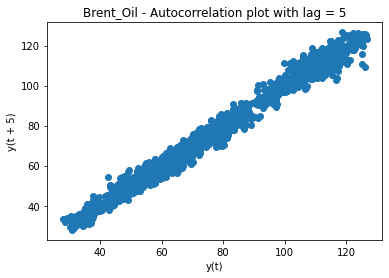

In [9]:
plt.figure()
lag_plot(df1['Close'], lag=5)
plt.title('Brent_Oil - Autocorrelation plot with lag = 5')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).
Finally, let’s plot the stock price evolution over time.

In [10]:
# df1

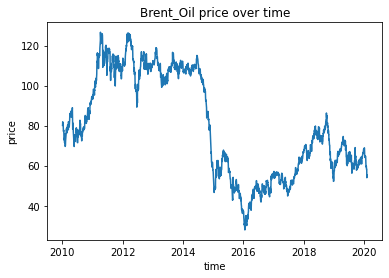

In [11]:
plt.plot(df1["Date"], df1["Close"])
# plt.xticks(np.arange(0,2485,100), df1['Date'][0:2485:100])
plt.title("Brent_Oil price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Next, let’s divide the data into a training (80 % ) and test (20%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [15]:
train_data, test_data = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]

In [16]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #yhat = output[0][0]
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\jakeb\anaconda3\envs\data_analytics\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 1.6357299131601857


In [17]:
# rowloc = df1.loc[df1["Close"] == 67.620003].index[1]
# rowloc

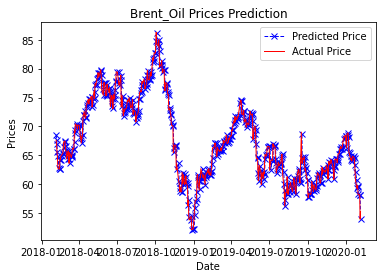

In [22]:
test_set_range = df1[int(len(df1)*0.8):].Date
plt.plot(test_set_range, model_predictions, color='blue', marker='x', linestyle='dashed',label='Predicted Price', lw=1)
plt.plot(test_set_range, test_data, color='red', label='Actual Price', lw=1)
plt.title('Brent_Oil Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df1.Date[881:1259:50])
plt.legend()
plt.show()

In [23]:
date_df=pd.DataFrame(df1[int(len(df1)*0.8):].Date)
df_test = pd.DataFrame(data=test_data)
df_preds = pd.DataFrame(data=model_predictions)

display(date_df.head(3), df_test.head(3), df_preds.head(3))

,Date
2459,2018-02-05
2460,2018-02-06
2461,2018-02-07


,0
0,67.620003
1,66.860001
2,65.510002


,0
0,68.575802
1,67.661133
2,66.906992


In [27]:
date_df.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_preds.reset_index(drop=True, inplace=True)

df_preds = df_preds.shift(periods=-1)

# p = p.iloc[:-1]
# t = t.iloc[:-1]

frames=[date_df['Date'],df_test[0],df_preds[0]]
headers=['Date','test','preds']
graphdata= pd.concat(frames, axis=1, keys=headers)

# graphdata = df_test.merge(df_preds, how='inner', suffixes=('_actual', '_prediction'))
graphdata

,Date,test,preds
0,2018-02-05,67.620003,67.661133
1,2018-02-06,66.860001,66.906992
2,2018-02-07,65.510002,65.550934
3,2018-02-08,64.809998,64.832978
4,2018-02-09,62.790001,62.836886
...,...,...,...
492,2020-01-30,58.290001,58.290388
493,2020-01-31,58.160000,58.212609
494,2020-02-03,58.200001,58.196170
495,2020-02-04,53.959999,54.069513


In [28]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([

    go.Scatter(
        name='Actual',
        x=graphdata.Date,
        y=graphdata['test'],
        mode='lines',
        marker=dict(color="#008080"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Prediction',
        x=graphdata.Date,
        y=graphdata['preds'],
        marker=dict(color="#FF8C00"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        showlegend=True
    )
])

fig.update_layout(
    yaxis_title='',
    title='',
    hovermode="x"
)

fig.show()